# Code for x-independent rainfall

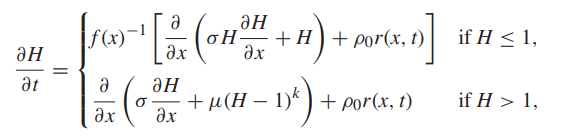

In [89]:
import numpy as np
import matplotlib.pyplot as plt      

L=1 # length of domain
nx = 201 # number of grid points
dx =   L/ (nx-1) # grid space 
x = np.linspace(0,L,nx) # coordinates of the grid points


from scipy.sparse import diags

def d1_mat(nx,dx): # matrix representing central finite differences for the first derivative
    diagonals = [[-1./2.], [0], [1./2.]] # main diagonal elements
    offsets = [-1, 0, 1]# positions of the elements with the respect to the diagonal
    mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()
    return mat /dx
def d2_mat(nx,dx):
    diagonals = [[1],[-2],[1]]
    offsets = [-1,0,1]
    mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()
    return mat /dx**2

d1mat = d1_mat(nx,dx)
d2mat = d2_mat(nx,dx)
print (d1mat)


[[   0.  100.    0. ...    0.    0.    0.]
 [-100.    0.  100. ...    0.    0.    0.]
 [   0. -100.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.  100.    0.]
 [   0.    0.    0. ... -100.    0.  100.]
 [   0.    0.    0. ...    0. -100.    0.]]


In [2]:
def d1_mat(nx,dx): # matrix representing central finite differences for the first derivative
    diagonals = [[-1./2.], [0], [1./2.]] # main diagonal elements
    offsets = [-1, 0, 1]# positions of the elements with the respect to the diagonal
    mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()
    return mat /dx
def d2_mat(nx,dx):
    diagonals = [[1],[-2],[1]]
    offsets = [-1,0,1]
    mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()
    return mat /dx**2

d1mat = d1_mat(nx,dx)
d2mat = d2_mat(nx,dx)
print (d1mat)

[[   0.  100.    0. ...    0.    0.    0.]
 [-100.    0.  100. ...    0.    0.    0.]
 [   0. -100.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.  100.    0.]
 [   0.    0.    0. ... -100.    0.  100.]
 [   0.    0.    0. ...    0. -100.    0.]]


In [4]:
#H[n]=0        H[0]=4/3*H[1]-1/3*H[2]

In [3]:
#euler method 
mu=100 
rho=0.6
sigma=0.1 
f=0.5
r=1
tf =4 # final time
dt=0.00005 # time step
nt=int(tf/dt) # number of time intervals 
H= np.empty([nt+1,nx])# creates an array for solution 
J= np.empty([nt+1,nx])
Q= np.empty([nt+1,nx])
#for i in range(nt):
    #H[i+1]= H[i]+dt*((1/f)(sigma*np.dot(d1mat@H[i],d1mat@H[i]) + sigma*H*d2mat@H+ d1mat@H +rho0*r)) 
    
    #H[i+1]= H[i]+dt *(sigma*d2mat@(1/2*H**2)+H



In [4]:
x = np.linspace(0,1,nx) # coordinates of the grid points
H[0]= 1-x



1.0309278350515465
1.139137490706142
-0.139137490706142
9.187135508372773
1.1221428421426913
1.0
1.395384087252226


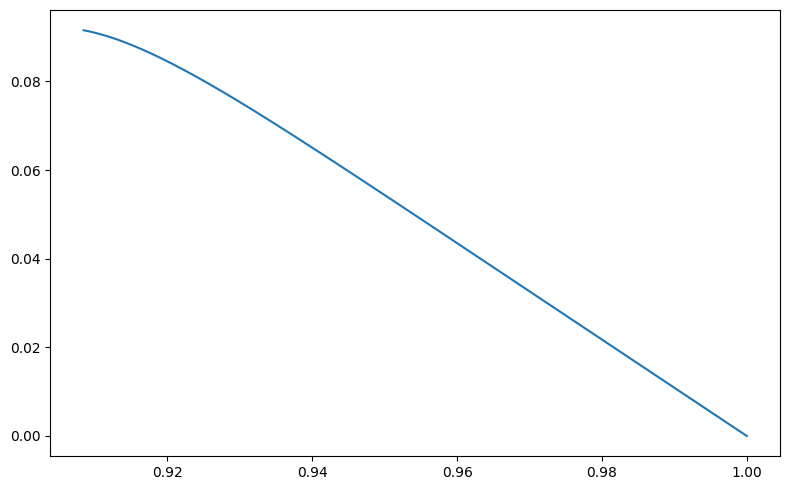

In [127]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

N = 201
sigma= 0.1
rho= 0.97

q=np.sqrt(1-4*sigma*rho)
b1 = (1+q)/(2*sigma*rho)
b2 = (1-q)/(2*sigma*rho)
beta = np.linspace(1/rho, b2, N)

C= 0.5*(1+1/q) 
D = 0.5* (1-1/q)
z= (np.abs(1/rho -b1))**C
g = (np.abs(1/rho - b2))**D
print(1/rho)
print(C)
print(D)
print(b1)
print(b2)
print(a)
print(g)


xi = 1-a*g*(np.abs(beta-b2)**(-D))/((np.abs(beta-b1))**C)
Hj= rho*beta*(1-xi)

fig, ax = plt.subplots()
ax.plot(xi, Hj)

plt.show()

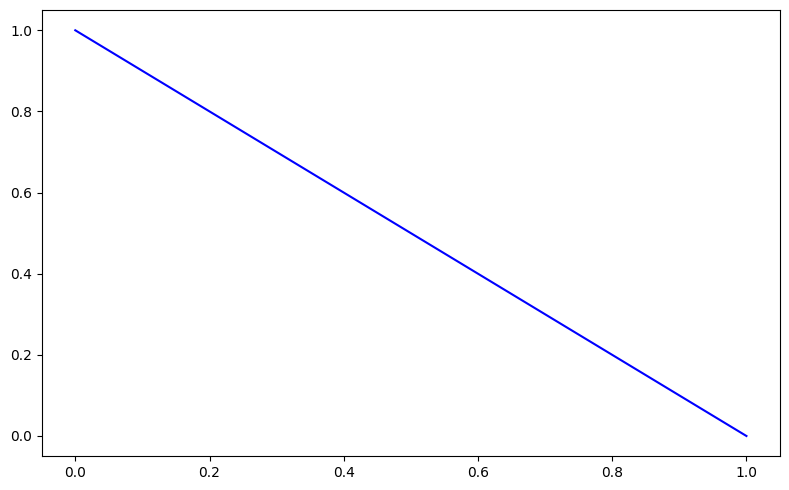

In [37]:
fig, ax = plt.subplots(figsize=(8,5))
line,=ax.plot(x,H[0],color='blue',label='initial condition')

1st set of characteristics

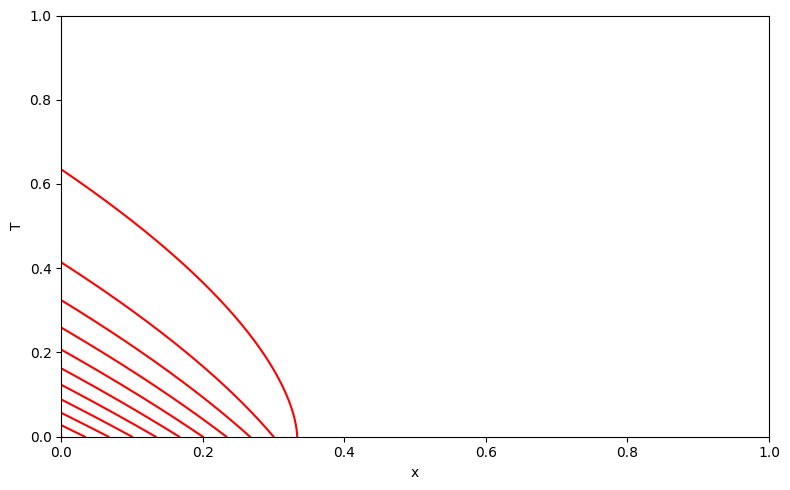

In [129]:
import numpy as np
import matplotlib.pyplot as plt
N=201
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
k=5/3 
rho0= 1.5
rho1=0.6
a0= 1- 1/rho0
tau= np.linspace(0,0.8,N)
fig, ax = plt.subplots(figsize=(8,5)) 
ax.set_xlim(0., 1)
ax.set_ylim(0., 1)
T1= tau
n=10
ds= a0/n
for j in range (n+1):
    s=j*ds
    eta0= rho0**(1/k)*(a0-s)**(1/k)
    x1= s-1/rho1 *(eta0+rho1*tau)**k+ 1/rho1*eta0**k
    line,=ax.plot(x1,T1,color='red',label='initial condition')
    plt.ylabel('T')
    plt.xlabel('x')

0.6666666666666666
1.290569415042095
-0.290569415042095
5.441518440112252
1.225148226554414
6.849901237790221
1.542243115761352


C:\Users\alexa\AppData\Local\Temp\ipykernel_12856\3398439569.py:97: RuntimeWarning: invalid value encountered in power
  taust=((a1/rho1**(k-1)))**(1/k)


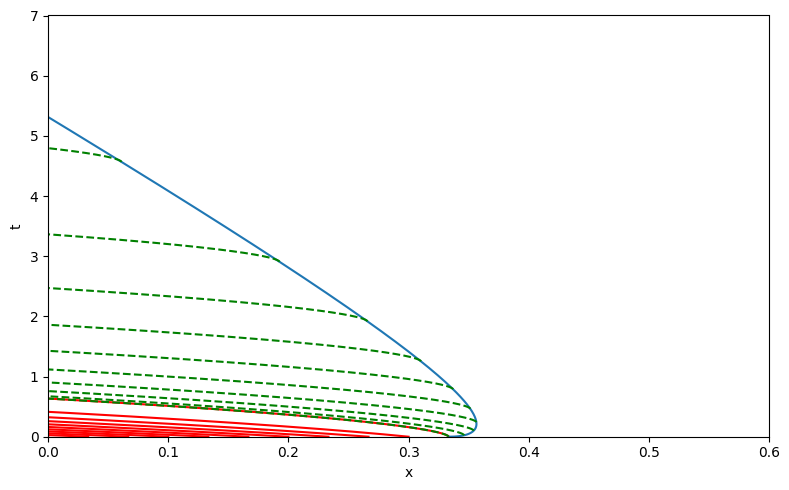

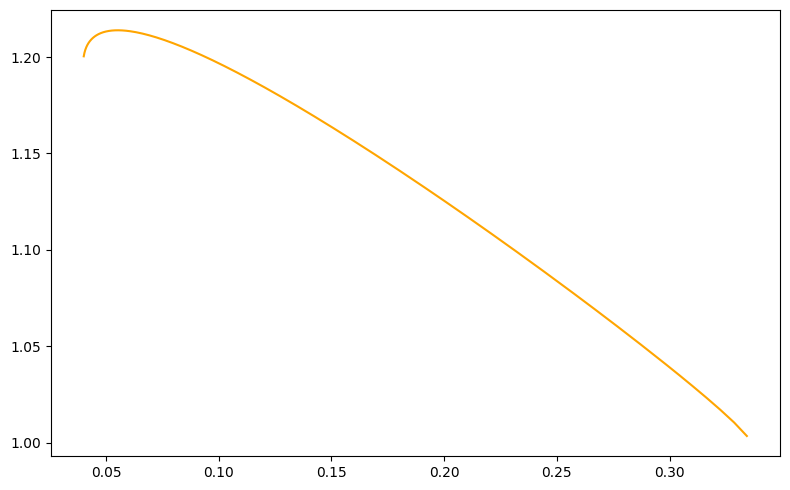

In [130]:
#this for a different case which hasn't been used in the dissertation.
import numpy as np
import matplotlib.pyplot as plt
N=201
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
k=5/3 
rho0= 1.5
rho1=0.6
a0= 1- 1/rho0
tau= np.linspace(0,0.8,N)
fig, ax = plt.subplots(figsize=(8,5)) 
ax.set_xlim(0., 1)
ax.set_ylim(0., 1)
T1= tau
n=10
ds= a0/n
for j in range (n+1):
    s=j*ds
    eta0= rho0**(1/k)*(a0-s)**(1/k)
    x1= s-1/rho1 *(eta0+rho1*tau)**k+ 1/rho1*eta0**k
    line,=ax.plot(x1,T1,color='red',label='initial condition')
    plt.ylabel('T')
    plt.xlabel('x')
    
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

N = 201
sigma= 0.1
rho0= 1.5
rho1= 0.6
f=0.5
beta = np.linspace(1+0.001, b2-0.001, N)
q=np.sqrt(1-4*sigma*rho0)
b1 = (1+q)/(2*sigma*rho0)
b2 = (1-q)/(2*sigma*rho0)
a0= 1-1/rho0

C= 0.5*(1+1/q) 
D = 0.5* (1-1/q)
z= (np.abs(1 -b1))**C
g = (np.abs(1 - b2))**D
print(1/rho0)
print(C)
print(D)
print(b1)
print(b2)
print(z) 
print(g)

ti= f/rho1*(1-beta*rho0*(1-a0)*z*g*((np.abs(beta-b2))**(-D))/((np.abs(beta-b1))**C))
xj = 1-(1-a0)*g*(np.abs(beta-b2)**(-D))/((np.abs(beta-b1))**C)
Hj= rho*beta*(1-xi)
a=1-ti/f-(1-a0)*z*g/((np.abs(beta-b1))**C*(np.abs(beta-b2))**D)

ax.plot(a, mu**(1/k)*ti)
ax.set_xlim(0., 0.6)
ax.set_ylim(0., 6)
plt.xlabel('x')
plt.ylabel('t')
import numpy as np
import matplotlib.pyplot as plt
mu =100
N=201
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
k=5/3 
rho0= 1.5
rho1=0.6
a0= 1- 1/rho0
tau= np.linspace(0,0.8,N)
 
ax.set_xlim(0., 0.6)
ax.set_ylim(0., 7)
n=10
ds= (b2-1)/n
eta0=0
a1=1-ti/f-(1-a0)*z*g*(np.abs(beta-b2))**(-D)/(np.abs(beta-b1))**C
#T = (rho0*(1-a)-1)**(1/k)/(mu**(1/k))(rho0-rho1)+tau
for j in range (n+1):
    s=1+j*ds
    tj= f/rho1*(1-s*rho0*(1-a0)*z*g*((np.abs(s-b2))**(-D))/((np.abs(s-b1))**C))
    a=1-tj/f-(1-a0)*z*g*(np.abs(s-b2))**(-D)/(np.abs(s-b1))**C
    #T1= tau
    #x1= s-1/rho1 *(eta0+rho1*tau)**k+ 1/rho1*eta0**k
    T2 = tj*mu**(1/k)+tau
    #eta0= rho0**(1/k)*(a0-s)**(1/k)
    #x = x0-rho^(-1)*(eta0+rho*(T-T0)).^k+rho^(-1)*eta0^k
    x2 = a-1/rho1*(eta0+rho1*tau)**k+1/rho1*eta0**k   
    line,=ax.plot(x2,T2,color='green',label='initial condition',linestyle= 'dashed')
    #line,=ax.plot(x1,T1,color='blue',label='initial condition')
     
taust=((a1/rho1**(k-1)))**(1/k)
Tst=ti*mu**(1/k)+taust
etast=rho1*taust
Qst=1+etast**k
fig, ax = plt.subplots(figsize=(8,5)) 
#ax.set_xlim(0., 6)
#ax.set_ylim(1, 1.5)
line,=ax.plot(mu**(-1/k)*Tst,Qst,color='orange')
#print(Tst)
#plt.show() '''



Characteristics for increasing rainfall

Text(0.5, 0, 'T')

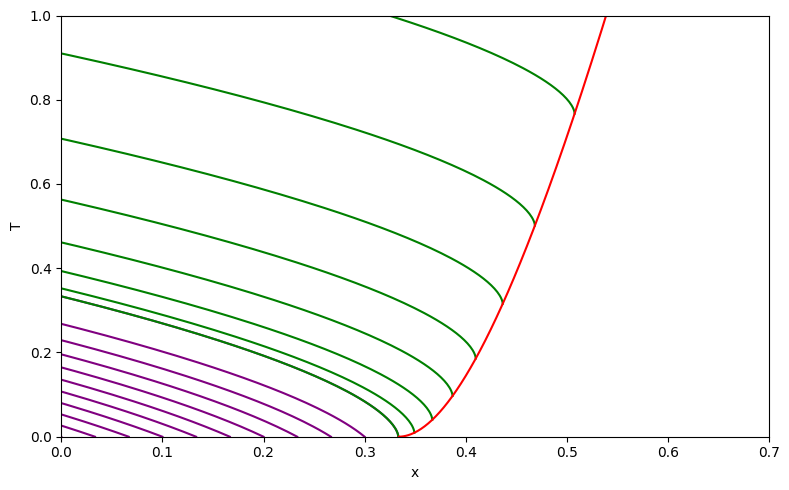

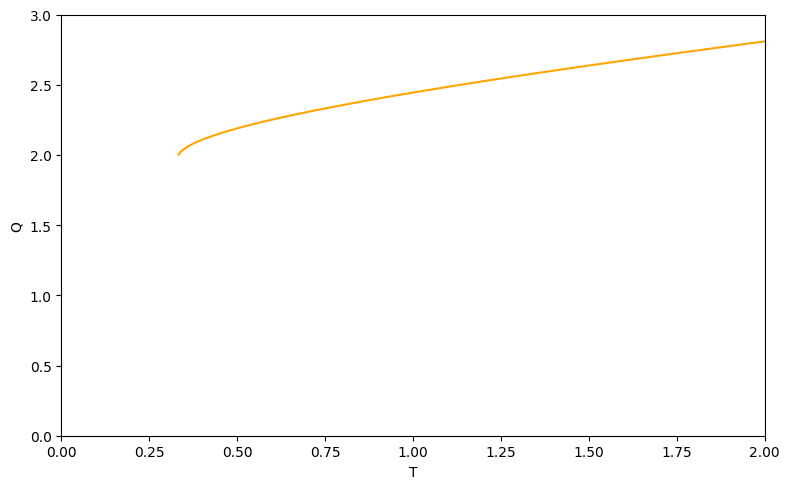

In [126]:
import numpy as np
import matplotlib.pyplot as plt
N=201
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
k=5/3 
rho0= 1.5
rho1=3
a0= 1- 1/rho0
tau= np.linspace(0,0.8,N)
fig, ax = plt.subplots(figsize=(8,5)) 
ax.set_xlim(0., 1)
ax.set_ylim(0., 1)
T1= tau
n=10
ds= a0/n
for j in range (n+1):
    s=j*ds
    eta0= rho0**(1/k)*(a0-s)**(1/k)
    x1= s-1/rho1 *(eta0+rho1*tau)**k+ 1/rho1*eta0**k
    line,=ax.plot(x1,T1,color='purple',label='initial condition')
    plt.ylabel('T')
    plt.xlabel('x')
import numpy as np
import matplotlib.pyplot as plt
mu =100
N=201
f=0.5
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
k=5/3 
rho0= 1.5
rho1=3
a0= 1- 1/rho0
tau= np.linspace(0,0.8,N)
beta = np.linspace(1+0.001, b2-0.0000001, N)
 
ax.set_xlim(0., 0.7)
ax.set_ylim(0., 1)
n=10
ds= (b2-1)/n
eta0=0
ti= f/(rho1-rho0)*(1-beta*rho0*(1-a0)*z*g*((np.abs(beta-b2))**(-D))/((np.abs(beta-b1))**C))
a1=1-(1-a0)*z*g*(np.abs(beta-b2))**(-D)/((np.abs(beta-b1))**C)
#T = (rho0*(1-a)-1)**(1/k)/(mu**(1/k))(rho0-rho1)+tau
for j in range (n+1):
    s=1+j*ds
    tj= f/(rho1-rho0)*(1-s*rho0*(1-a0)*z*g*((np.abs(s-b2))**(-D))/((np.abs(s-b1))**C))
    a=1-(1-a0)*z*g*(np.abs(s-b2))**(-D)/((np.abs(s-b1))**C)
    #T1= tau
    #x1= s-1/rho1 *(eta0+rho1*tau)**k+ 1/rho1*eta0**k
    T2 = tj*mu**(1/k)+tau
    #eta0= rho0**(1/k)*(a0-s)**(1/k)
    #x = x0-rho^(-1)*(eta0+rho*(T-T0)).^k+rho^(-1)*eta0^k
    x2 = a-1/rho1*(eta0+rho1*tau)**k+1/rho1*eta0**k   
    line,=ax.plot(x2,T2,color='green',label='initial condition')
    #line,=ax.plot(x1,T1,color='blue',label='initial condition')
   

line,=ax.plot(a1,mu**(1/k)*ti,color='red',label='initial condition')

plt.ylabel('T')
plt.xlabel('x')


taust=(a1/rho1**(k-1))**(1/k)
Tst=ti*mu**(1/k)+taust
etast=rho1*taust
Qst=1+etast**k
fig, ax = plt.subplots(figsize=(8,5)) 
ax.set_xlim(0., 2)
ax.set_ylim(0, 3)
line,=ax.plot(Tst,Qst,color='orange')
plt.ylabel('Q')
plt.xlabel('T')
#print(Tst)
#plt.show()

Text(0.5, 0, 'T')

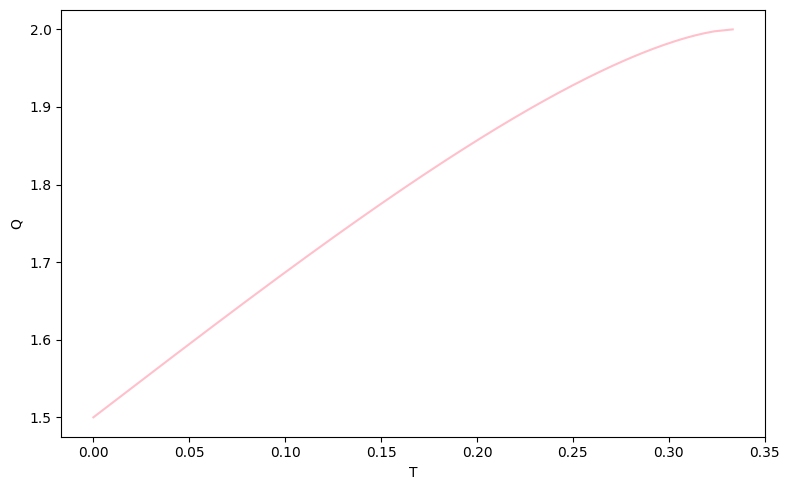

In [123]:
#approximation for the flux using the first characteristics
rho0=1.5
rho1=3
xs=np.linspace(0,a0,N)
eta0= rho0**(1/k)*(a0-xs)**(1/k)
#taust=(a1/rho1**(k-1))**(1/k)
taustb= ((rho1*xs+ eta0**k)**(1/k)-eta0)/rho1
#Tst=ti*mu**(1/k)+taust
etastk=rho1*xs+eta0**k
Qsta=1+etastk
fig, ax = plt.subplots(figsize=(8,5)) 
#ax.set_xlim(0., 1)
#ax.set_ylim(0, 5)
line,=ax.plot(taustb,Qsta,color='pink')
plt.ylabel('Q')
plt.xlabel('T')
#print(etastk)
#print(eta0**k)
#print(xs)
#print(Qst)
#print(taust)

#plt.show()

Characteristics for decreasing rainfall with rho0=1.5 and rho1=0.6

Text(0.5, 0, 'x')

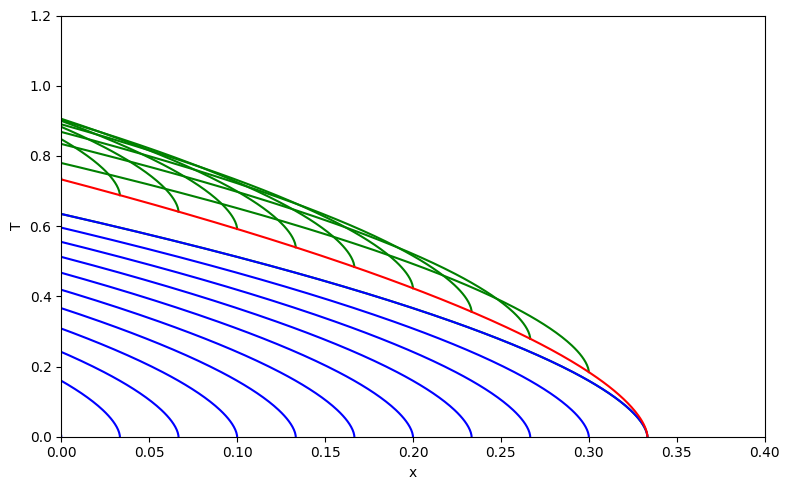

In [99]:
import numpy as np
import matplotlib.pyplot as plt
N=201
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
k=5/3 
rho0= 1.5
rho1= 0.6
a0= 1- 1/rho0
tau= np.linspace(0,0.8,N)
fig, ax = plt.subplots(figsize=(8,5)) 
ax.set_xlim(0., 0.4)
ax.set_ylim(0., 1.2)
n=10
ds= a0/n
eta0=rho0**(1/k)*(a0-s)**(1/k)
 
#T = (rho0*(1-a)-1)**(1/k)/(mu**(1/k))(rho0-rho1)+tau
for j in range (n+1):
    s=j*ds
    T1= tau
    x1= s-1/rho1 *(eta0+rho1*tau)**k+ 1/rho1*eta0**k
    T2 = (rho0*(1-s)-1)**(1/k)/(rho0-rho1)+tau
    #eta0= rho0**(1/k)*(a0-s)**(1/k)
    #x = x0-rho^(-1)*(eta0+rho*(T-T0)).^k+rho^(-1)*eta0^k
    x2 = s-1/rho1*(rho1*tau)**k   
    line,=ax.plot(x2,T2,color='green',label='initial condition')
    line,=ax.plot(x1,T1,color='blue',label='initial condition')
a=1-1/(rho0)*(1+T2**k*(rho0-rho1)**k)    
line,=ax.plot(a,T2,color='red',label='initial condition')
mu**(-1/k)
plt.ylabel('T')
plt.xlabel('x')
#ax.set_xlim(0., 2)
#ax.set_ylim(, 1.5)


Characteristics for decreasing rainfall with rho0= 1.5 rho1=1.1

C:\Users\alexa\AppData\Local\Temp\ipykernel_12856\902173715.py:37: RuntimeWarning: invalid value encountered in power
  taust=(a/rho1**(k-1))**(1/k)


Text(0.5, 0, 'T')

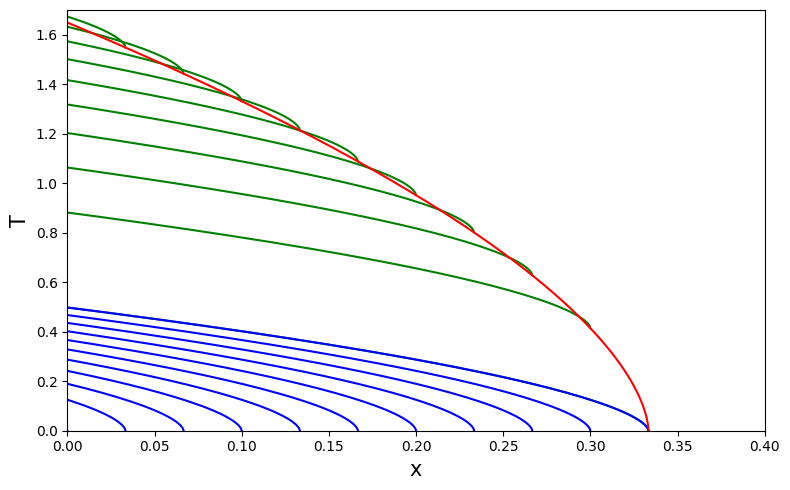

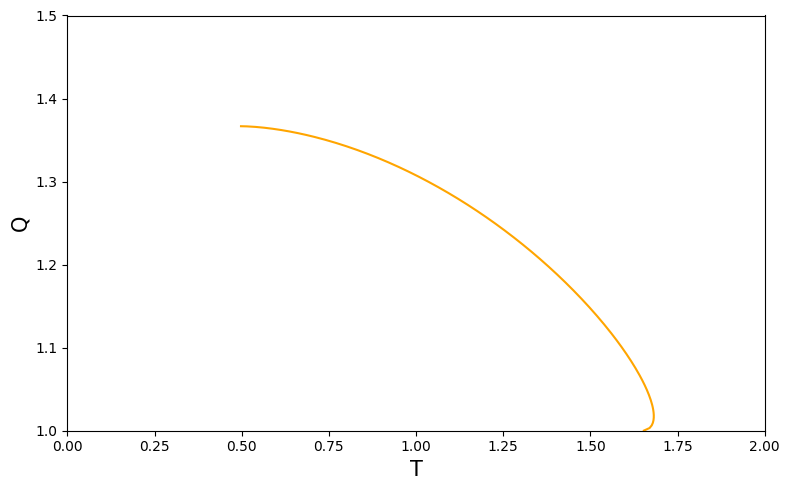

In [83]:
import numpy as np
import matplotlib.pyplot as plt
N=201
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
k=5/3 
rho0= 1.5
rho1= 1.1
a0= 1- 1/rho0
tau= np.linspace(0,1.7,N)
cd=np.linspace(0,a0,N-3)
fig, ax = plt.subplots(figsize=(8,5)) 
ax.set_xlim(0., 0.4)
ax.set_ylim(0., 1.7)
n=10
ds= a0/n
eta0=rho0**(1/k)*(a0-s)**(1/k)
 
#T0 = (rho0*(1-a)-1)**(1/k)/(mu**(1/k))(rho0-rho1)
for j in range (n+1):
    s=j*ds
    T1= tau
    x1= s-1/rho1 *(eta0+rho1*tau)**k+ 1/rho1*eta0**k
    T2 = (rho0*(1-s)-1)**(1/k)/(rho0-rho1)+tau
    #eta0= rho0**(1/k)*(a0-s)**(1/k)
    #x = x0-rho^(-1)*(eta0+rho*(T-T0)).^k+rho^(-1)*eta0^k
    x2 = s-1/rho1*(rho1*tau)**k   
    line,=ax.plot(x2,T2,color='green',label='initial condition')
    line,=ax.plot(x1,T1,color='blue',label='initial condition')
#T0 = (rho0*(1-s)-1)**(1/k)/(mu**(1/k))*(rho0-rho1)
#a=s
a=1-1/(rho0)*(1+T2**k*(rho0-rho1)**k)    
line,=ax.plot(a,T2,color='red',label='initial condition')
mu**(-1/k)
plt.ylabel('T',fontsize=15)
plt.xlabel('x',fontsize=15)
taust=(a/rho1**(k-1))**(1/k)
Tst=T2+taust
etast=rho1*taust
Qst=1+etast**k
fig, ax = plt.subplots(figsize=(8,5)) 
ax.set_xlim(0., 2)
ax.set_ylim(1, 1.5)
line,=ax.plot(Tst,Qst,color='orange')
plt.ylabel('Q',fontsize=15)
plt.xlabel('T',fontsize=15)


The flux corresponding to the first set of characteristics.

Text(0.5, 0, 'T')

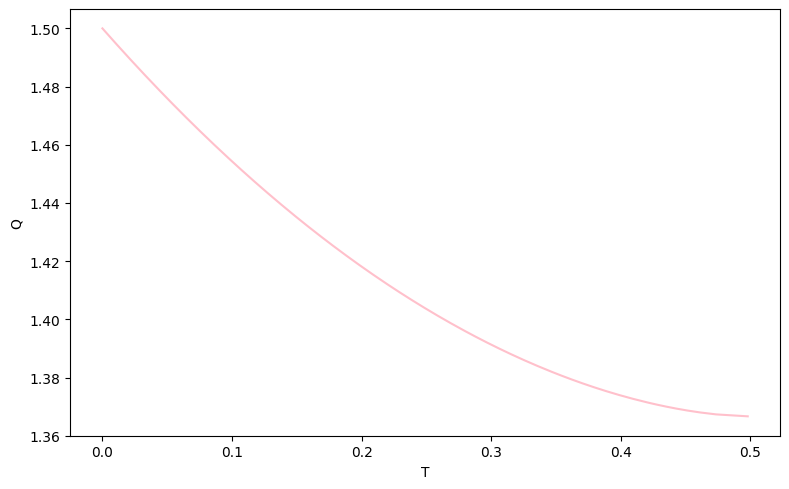

In [54]:
rho0=1.5
rho1=1.1
xs=np.linspace(0,a0,N)
eta0= rho0**(1/k)*(a0-xs)**(1/k)
#taust=(a1/rho1**(k-1))**(1/k)
taustb= ((rho1*xs+ eta0**k)**(1/k)-eta0)/rho1
#Tst=ti*mu**(1/k)+taust
etastk=rho1*xs+eta0**k
Qsta=1+etastk
fig, ax = plt.subplots(figsize=(8,5)) 
#ax.set_xlim(0., 1)
#ax.set_ylim(0, 5)
line,=ax.plot(taustb,Qsta,color='pink')
plt.ylabel('Q')
plt.xlabel('T')

Definition of fn

In [61]:
#taking away rainfall
rho= 1.5 
def fn(H): 
    u=H*H/2
    v= sigma*(d2mat@u)+d1mat@H+rho
    return((v/f))

    

Definition of seep

In [62]:
rho=1.5
def seep(H): 
    c= sigma*d2mat@H + mu*(5/3)*(np.abs(H-1))**(2.0/3.0)*(d1mat@H)+rho   #using a linear approximation
    return (c)
 
    
    

Time integration of the PDE

'for i in range(int(nt/5),int(3*nt/5)):\n    rho0=1.5\n    H[i+1]=H[i]+seep(H[i])*dt*(np.sign(H[i]-1)+1)/2 +fn(H[i])*dt*(np.sign(1-H[i])+1)/2\n    H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]# implementing boundary conditions\n    if H[i+1,0]<=1 :    \n        H[i+1,0]=1\n    #H[i+1,nx-1]=0 #simplified\n    #H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0\nfor i in range(int(3*nt/5),int(nt)):\n    rho0=0.6\n    H[i+1]=H[i]+seep(H[i])*dt*(np.sign(H[i]-1)+1)/2 +fn(H[i])*dt*(np.sign(1-H[i])+1)/2\n    H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]# implementing boundary conditions\n    if H[i+1,0]<=1 :    \n        H[i+1,0]=1\n    #H[i+1,nx-1]=0 #simplified\n    #H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0'

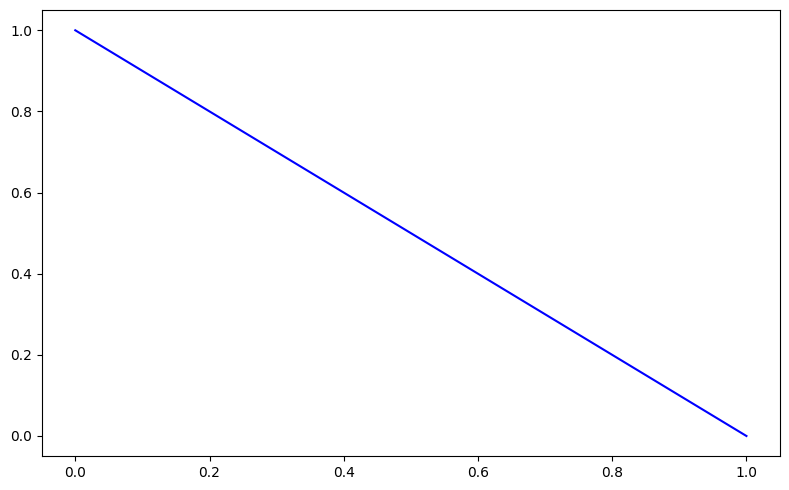

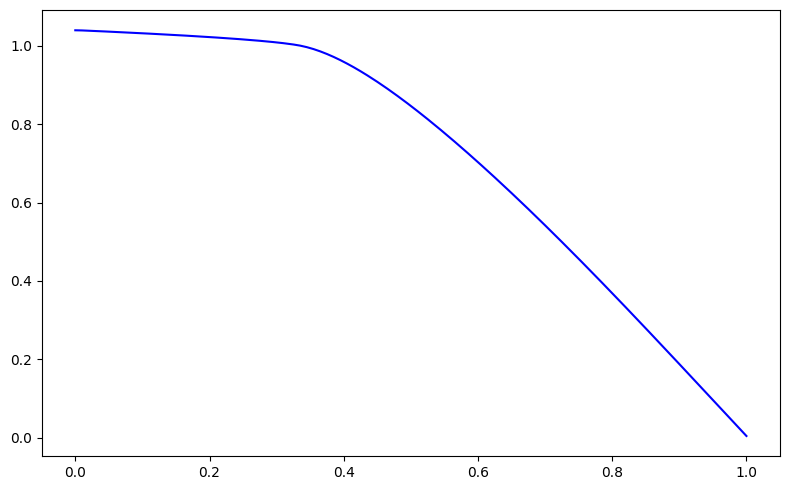

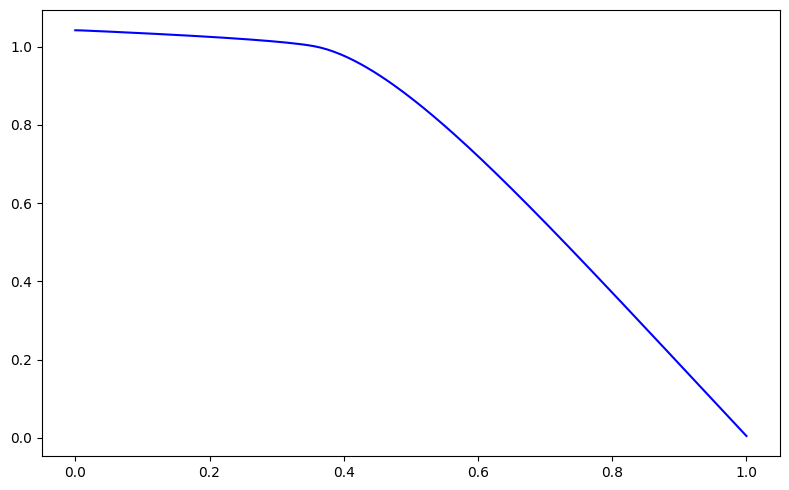

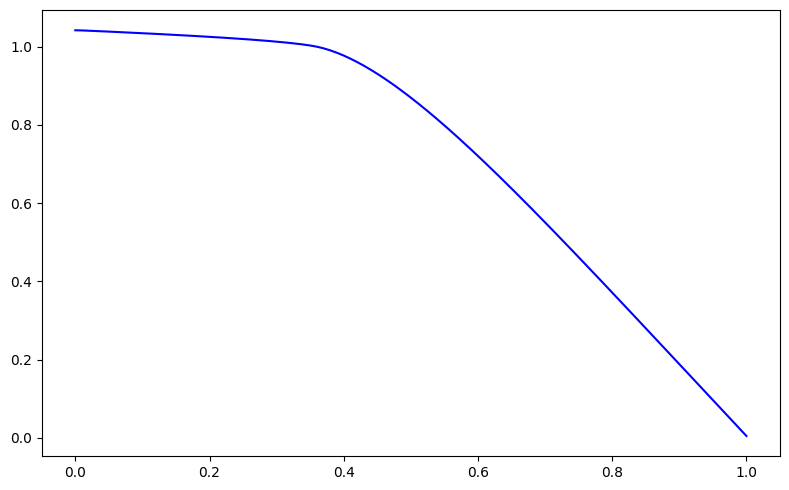

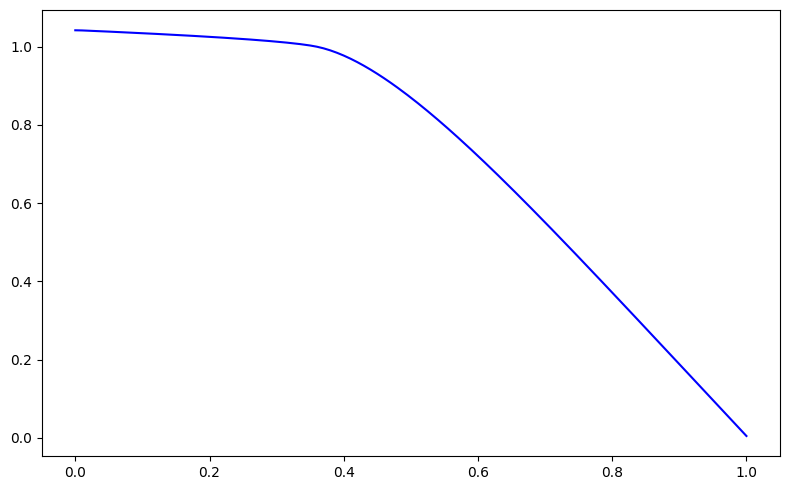

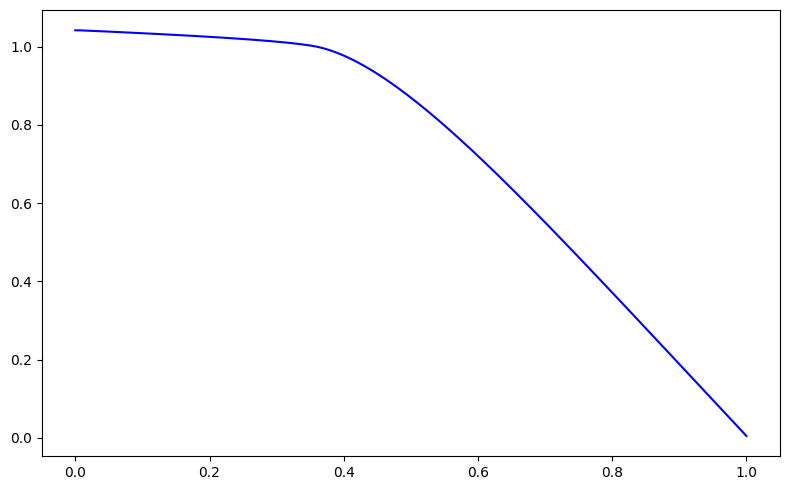

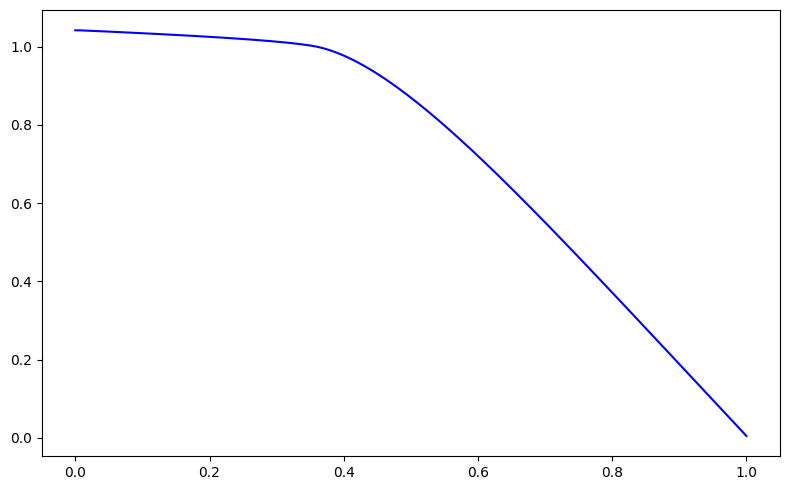

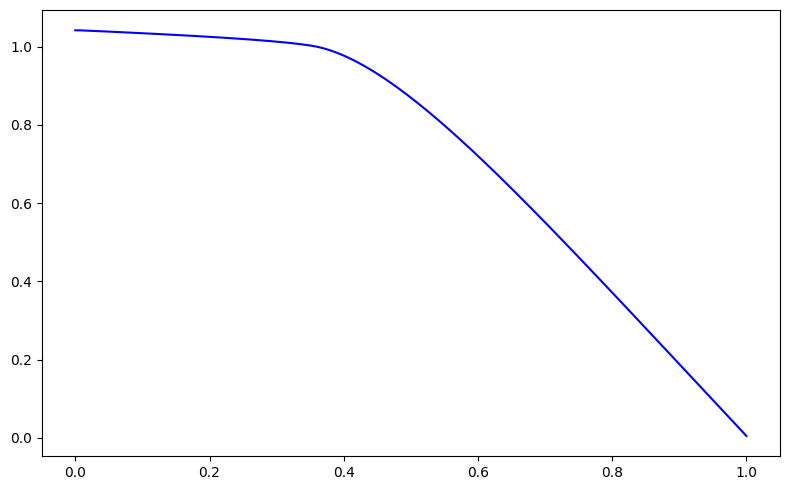

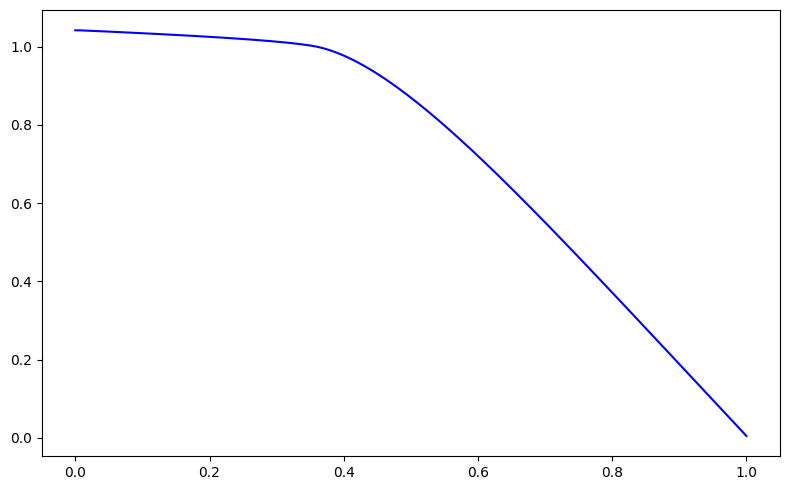

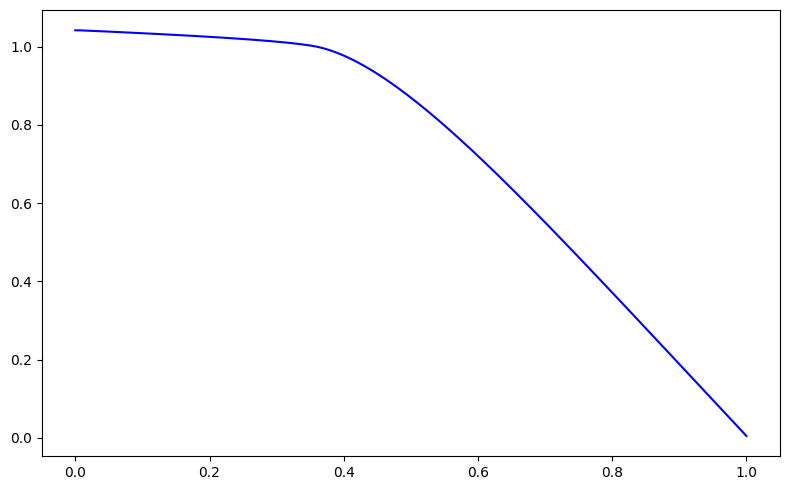

In [63]:


#the part relating to H>1 multiplied by (sign(H-1)+1)/2

#the part relating to H<1 multiplied by (sign(1-H)+1)/2
#Q[nx+1/2] =0


d1mat[nx-1,nx-2:nx]= np.array([-0.5,-0.5])/dx
d2mat[nx-1,nx-2:nx]= np.array([1,-1])/dx**2
for i in range(int(nt)):
    
    H[i+1]=H[i]+seep(H[i])*dt*(np.sign(H[i]-1)+1)/2 +fn(H[i])*dt*(np.sign(1-H[i])+1)/2
    H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]# implementing boundary conditions
    if H[i+1,0]<=1 :    
        H[i+1,0]=1
    #H[i+1,nx-1]=0 #simplified
    #H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0
    if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(8,5))  
        line,=ax.plot(x,H[i],color='blue',label='height')
        
        #if you want to switch the rainfall without having got to a steady state then uncomment the part below in red.
        ''' legend = ax.legend(bbox_to_anchor=(1.04,0.5), loc='center left', shadow=True, fontsize='x-large')
        ax.set_xlim(0., T)
        ax.set_ylim(0., N/4)'''
'''for i in range(int(nt/5),int(3*nt/5)):
    rho0=1.5
    H[i+1]=H[i]+seep(H[i])*dt*(np.sign(H[i]-1)+1)/2 +fn(H[i])*dt*(np.sign(1-H[i])+1)/2
    H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]# implementing boundary conditions
    if H[i+1,0]<=1 :    
        H[i+1,0]=1
    #H[i+1,nx-1]=0 #simplified
    #H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0
for i in range(int(3*nt/5),int(nt)):
    rho0=0.6
    H[i+1]=H[i]+seep(H[i])*dt*(np.sign(H[i]-1)+1)/2 +fn(H[i])*dt*(np.sign(1-H[i])+1)/2
    H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]# implementing boundary conditions
    if H[i+1,0]<=1 :    
        H[i+1,0]=1
    #H[i+1,nx-1]=0 #simplified
    #H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0'''
    


        
    
    
    
    
    
    


80000
1.0417453755490416


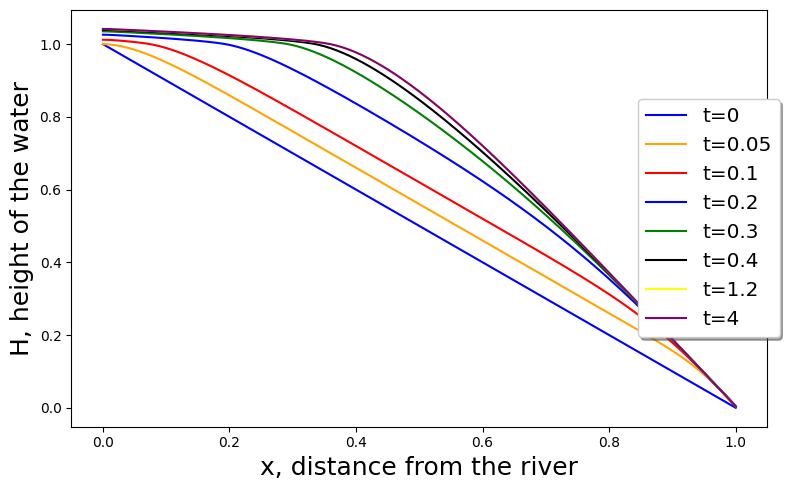

In [116]:
#snapshots of H
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(x,H[0],color='blue',label='t=0')
line,=ax.plot(x,H[1000],color='orange',label='t=0.05')
line,=ax.plot(x,H[2000],color='red',label='t=0.1')
line,=ax.plot(x,H[4000],color='blue',label='t=0.2')
line,=ax.plot(x,H[6000],color='green',label='t=0.3')
line,=ax.plot(x,H[8000],color='black',label='t=0.4')
line,=ax.plot(x,H[3*int(nt/10)],color='yellow',label='t=1.2')
line,=ax.plot(x,H[nt],color='purple',label='t=4')
legend = ax.legend(bbox_to_anchor=(0.8,0.5), loc='center left', shadow=True, fontsize='x-large')
#plt.title('evolution of height with rho0=0.6')
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
fig.savefig('test.jpg')
plt.xlabel('x, distance from the river')
plt.ylabel('H, height of the water')
print(nt)
print(H[nt,0])

1.0417453755490416
0.8695163613817324


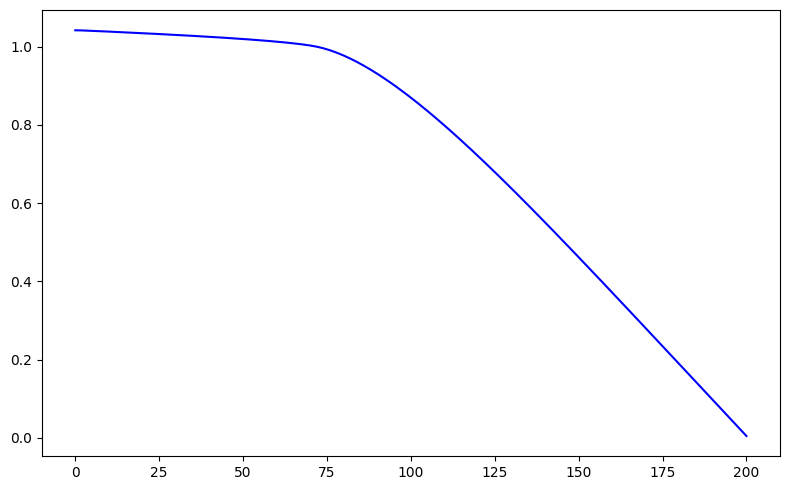

In [67]:
#use the above as the initial condition
for i in range(nx):
    J[0,i]=H[nt,i]
    
print(J[0,0])
print(J[0,100])
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(J[0],color='blue',label='height')

In [68]:


 
print(np.abs(-1))
rho=1.1
def seep(J): 
    c= sigma*d2mat@J + mu*5/3*(np.abs(J-1))**(2/3) *(d1mat@J)+rho   #using a linear approximation
    return (c)

1


"if i%(nt/10)==0:\n        fig, ax = plt.subplots(figsize=(15,5))  \n        line,=ax.plot(J[i],color='blue',label='height')\n         legend = ax.legend(bbox_to_anchor=(1.04,0.5), loc='center left', shadow=True, fontsize='x-large')\n        ax.set_xlim(0., T)\n        ax.set_ylim(0., N/4)"

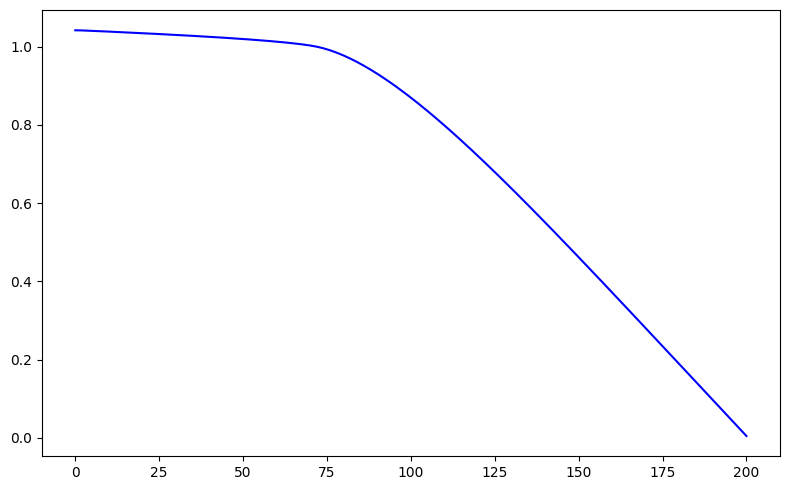

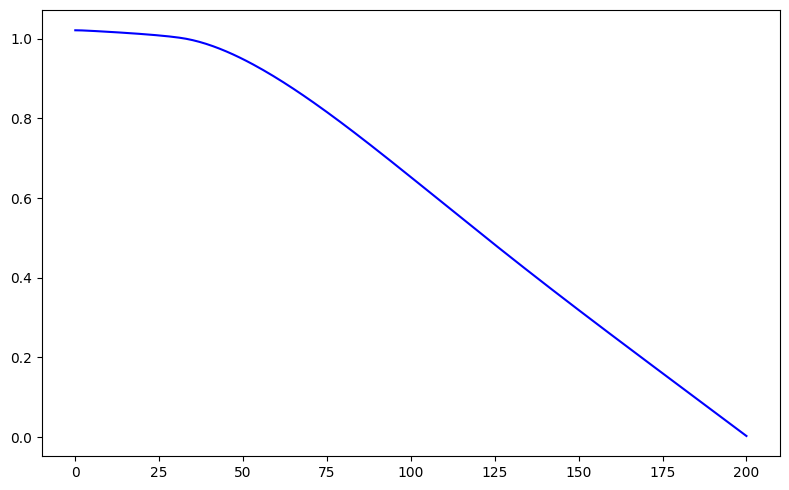

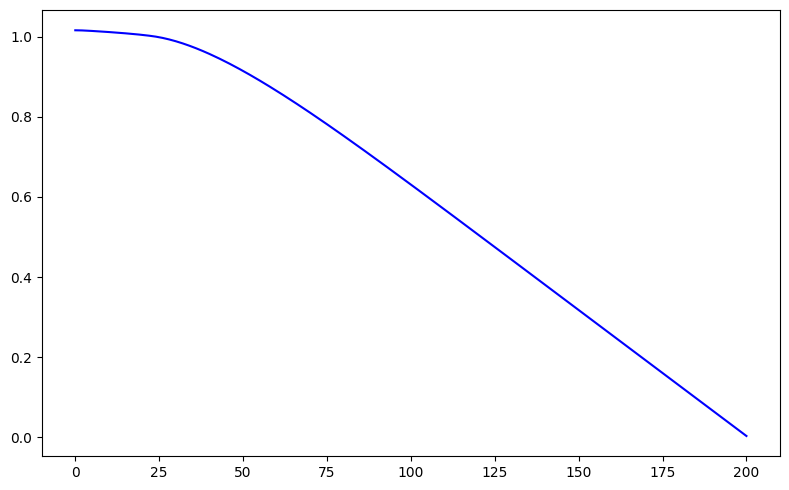

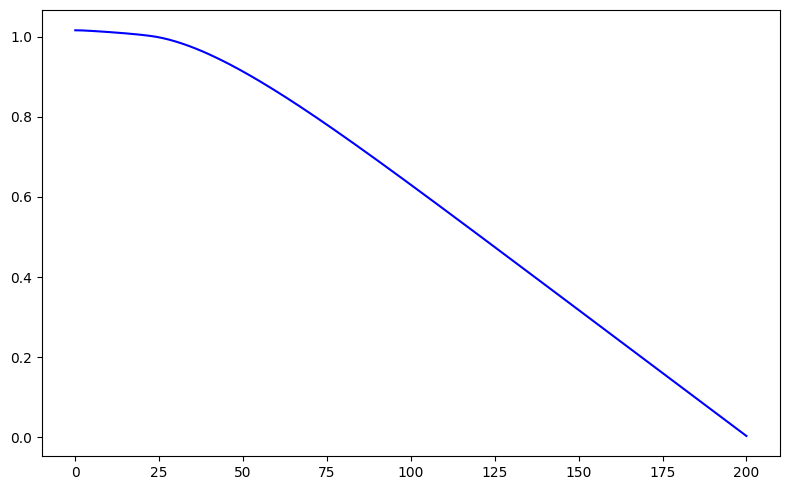

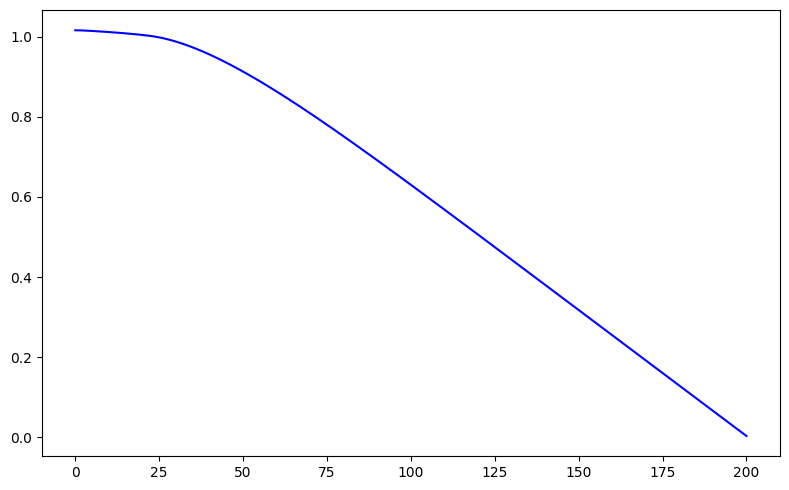

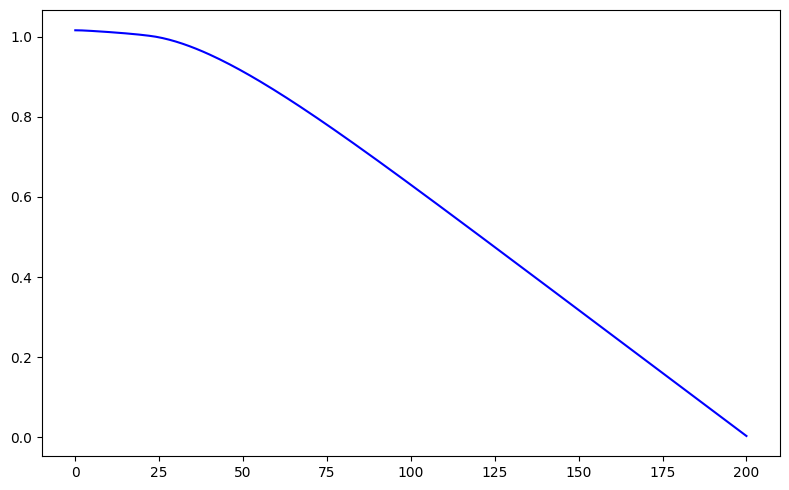

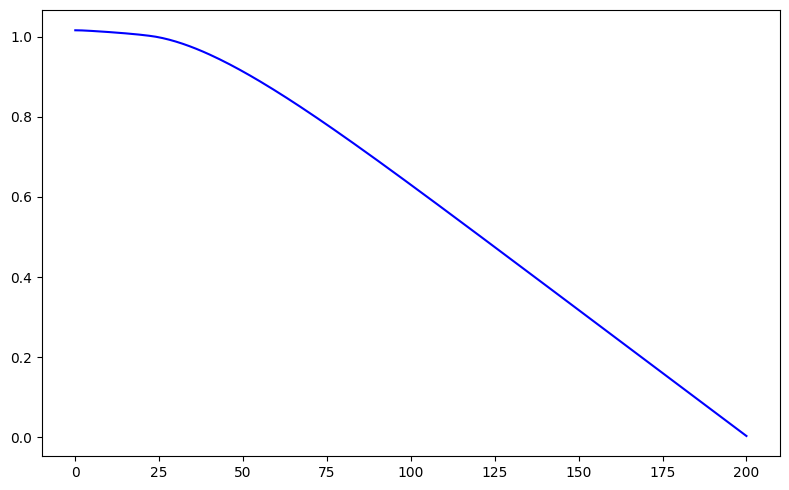

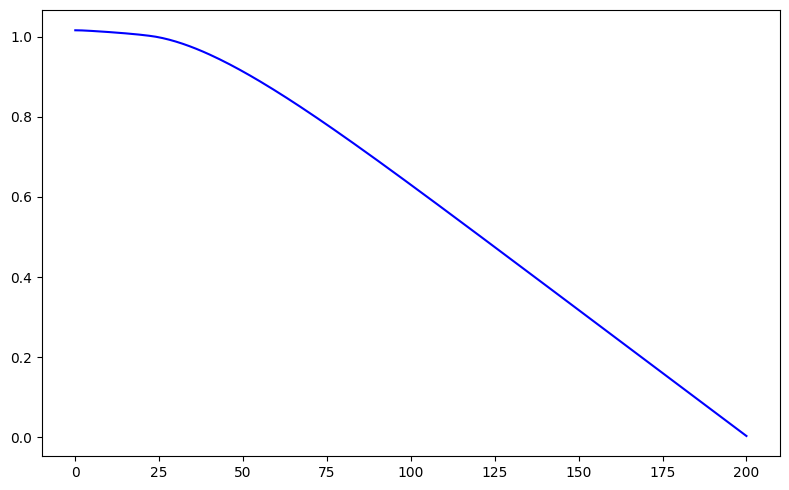

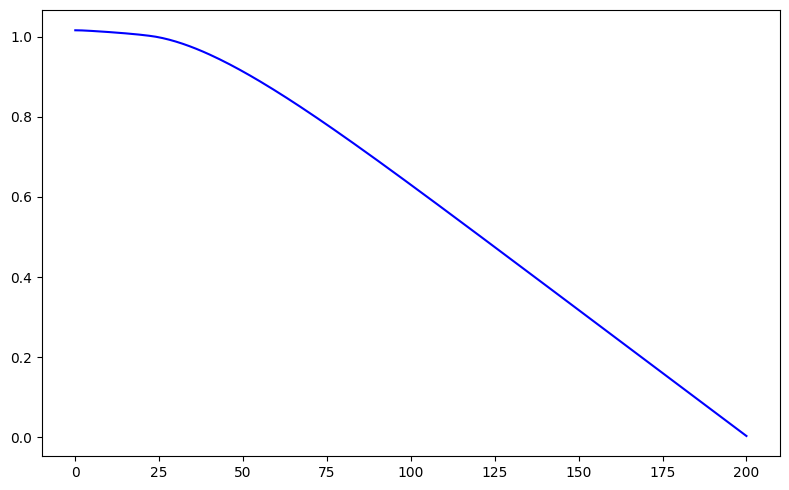

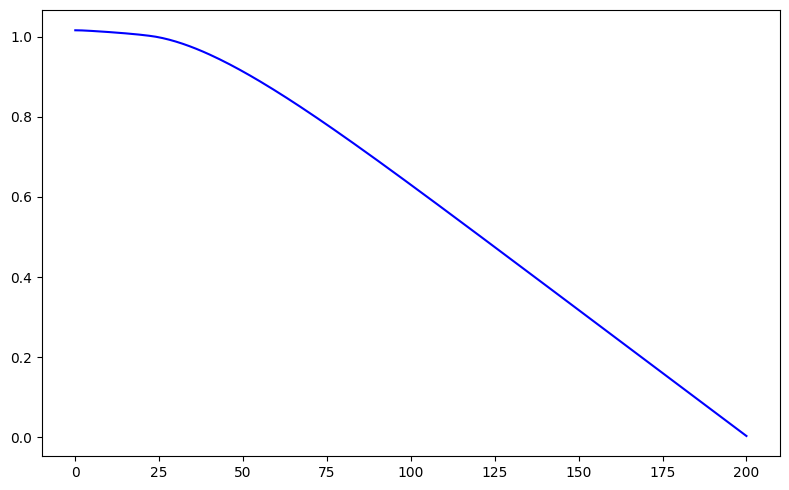

In [69]:
#the part relating to H>1 multiplied by (sign(H-1)+1)/2

#the part relating to H<1 multiplied by (sign(1-H)+1)/2
d1mat[nx-1,nx-2:nx]= np.array([-0.5,-0.5])/dx
d2mat[nx-1,nx-2:nx]= np.array([1,-1])/dx**2
for i in range(nt):
    J[i+1]=J[i]+seep(J[i])*dt*(np.sign(J[i]-1)+1)/2 +fn(J[i])*dt*(np.sign(1-J[i])+1)/2
    J[i+1,0]=4.0/3.0*J[i+1,1]-1/3*J[i+1,2]# implementing boundary conditions
    if J[i+1,0]<=1 :    
        J[i+1,0]=1
    #J[i+1,nx-1]=0 #simplified
    #J[i+1,nx-1]= (-dx/(sigma) -1/2*J[i+1,nx-3]+2*J[i+1,nx-2])*2.0/3.0
    if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(8,5))  
        line,=ax.plot(J[i],color='blue',label='height')
        
'''d1mat[nx-1,nx-2:nx]= np.array([-0.5,-0.5])/dx
d2mat[nx-1,nx-2:nx]= np.array([1,-1])/dx**2

for i in range(int(nt/5)):
    rho0=0.6
    J[i+1]=J[i]+seep(J[i])*dt*(np.sign(J[i]-1)+1)/2 +fn(J[i])*dt*(np.sign(1-J[i])+1)/2
    J[i+1,0]=4.0/3.0*J[i+1,1]-1/3*J[i+1,2]# implementing boundary conditions
    if J[i+1,0]<=1 :    
        J[i+1,0]=1
    #H[i+1,nx-1]=0 #simplified
    #H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0
for i in range(int(nt/5),int(3*nt/5)):
    rho0=1.5
    J[i+1]=J[i]+seep(J[i])*dt*(np.sign(J[i]-1)+1)/2 +fn(J[i])*dt*(np.sign(1-J[i])+1)/2
    J[i+1,0]=4.0/3.0*J[i+1,1]-1/3*J[i+1,2]# implementing boundary conditions
    if J[i+1,0]<=1 :    
        J[i+1,0]=1
    #H[i+1,nx-1]=0 #simplified
    #H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0
for i in range(int(3*nt/5),int(nt)):
    rho0=0.6
    J[i+1]=J[i]+seep(J[i])*dt*(np.sign(J[i]-1)+1)/2 +fn(J[i])*dt*(np.sign(1-J[i])+1)/2
    J[i+1,0]=4.0/3.0*J[i+1,1]-1/3*J[i+1,2]# implementing boundary conditions
    if J[i+1,0]<=1 :    
        J[i+1,0]=1
    #H[i+1,nx-1]=0 #simplified
    #H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0'''
    
        
    
    
'''if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(15,5))  
        line,=ax.plot(J[i],color='blue',label='height')
         legend = ax.legend(bbox_to_anchor=(1.04,0.5), loc='center left', shadow=True, fontsize='x-large')
        ax.set_xlim(0., T)
        ax.set_ylim(0., N/4)'''
        
        

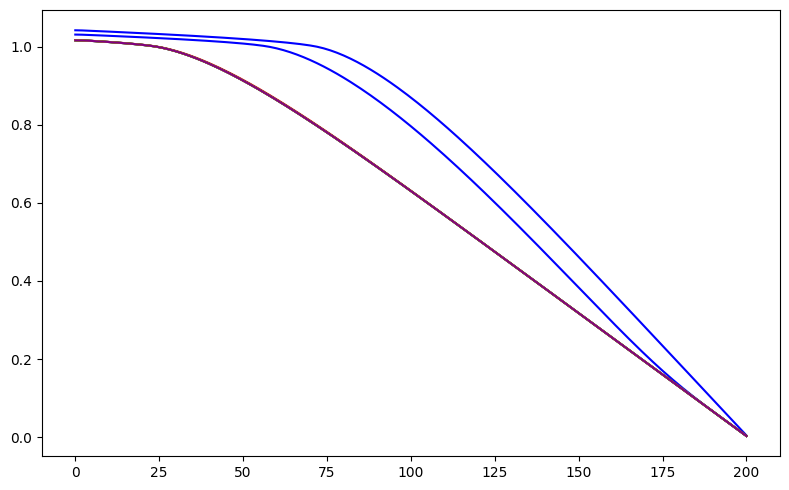

In [70]:
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(J[0],color='blue',label='height')
line,=ax.plot(J[2000],color='blue',label='height')
line,=ax.plot(J[int(nt/5)],color='red',label='height')
line,=ax.plot(J[3*int(nt/10)],color='blue',label='height')
line,=ax.plot(J[5*int(nt/10)],color='green',label='height')
line,=ax.plot(J[7*int(nt/10)],color='black',label='height')
line,=ax.plot(J[9*int(nt/10)],color='yellow',label='height')
line,=ax.plot(J[nt],color='purple',label='height')


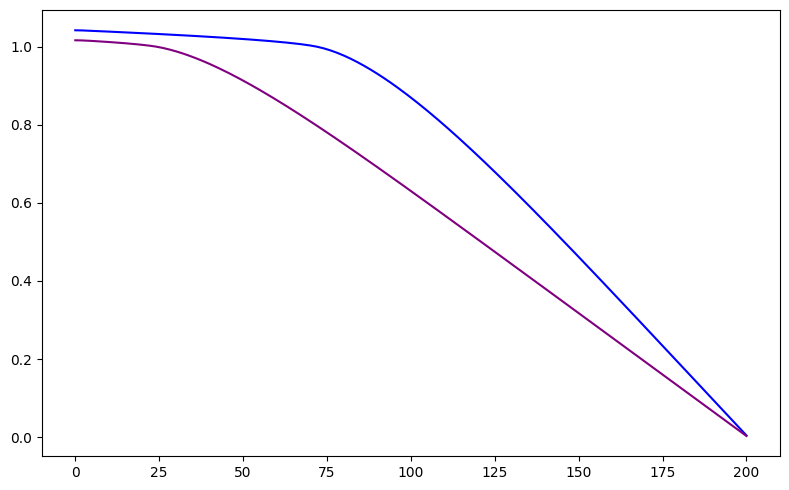

In [71]:
fig, ax = plt.subplots(figsize=(8,5))
line,=ax.plot(J[0],color='blue',label='height')
line,=ax.plot(J[nt],color='purple',label='height')

C:\Users\alexa\AppData\Local\Temp\ipykernel_12856\1985088449.py:13: RuntimeWarning: invalid value encountered in power
  line,=ax.plot(t,1+mu*((0.5/mu)**(3/5)-((rho1-rho0)*t))**(5/3.0),color='red',label='analytical approximation')


Text(0.5, 0, 'time,t')

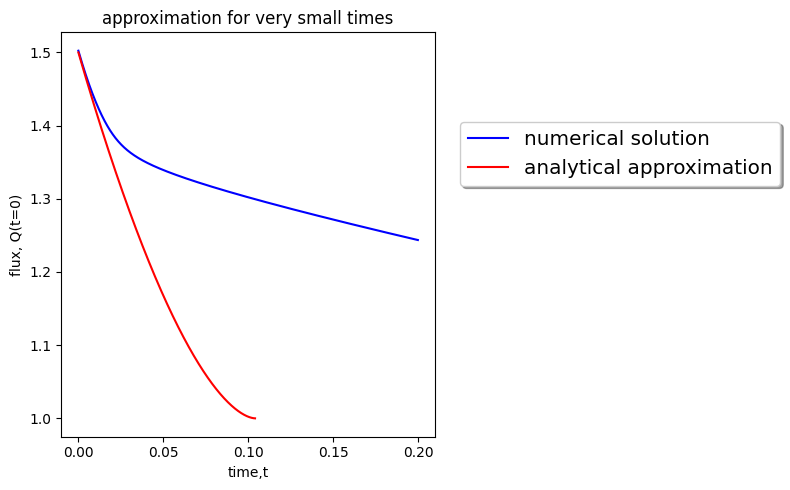

In [113]:
mu=100
rho1=1.5
rho0=1.1
for j in range(nt):
    Q[j,0]=1+100*(J[j,0]-1)**(5/3)
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(t[:int(nt/20)],Q[:int(nt/20),0],color='blue',label='numerical solution')


#ax.set_xlim(0, 0.5)
#ax.set_ylim(0.5, 1.5)

line,=ax.plot(t,1+mu*((0.5/mu)**(3/5)-((rho1-rho0)*t))**(5/3.0),color='red',label='analytical approximation') 
legend = ax.legend(bbox_to_anchor=(1.04,0.7), loc='center left', shadow=True, fontsize='x-large') 
plt.title('approximation for very small times')
plt.ylabel('flux, Q(t=0)')
plt.xlabel('time,t')
#fig, ax = plt.subplots(figsize=(8,5)) 
#line,=ax.plot(K[:1000,0],color='blue',label='height')

80000
1.502358730185867


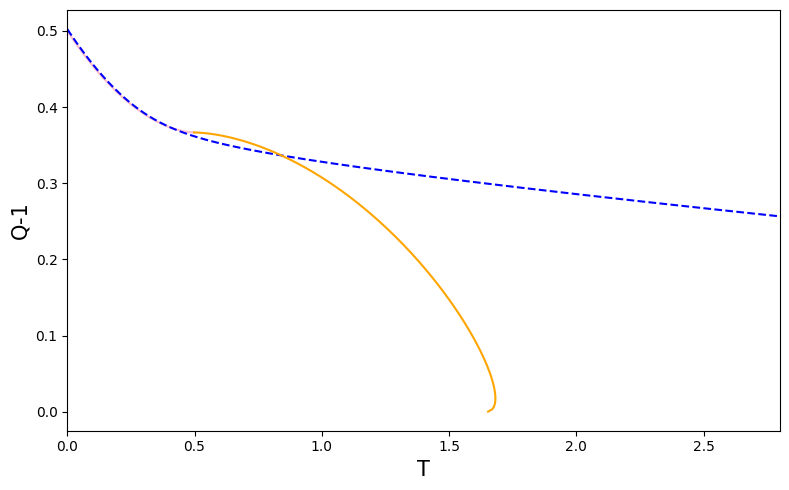

In [88]:
#Plot 6.17 t in terms of Q rho decreasing from 1.5 to 1.01 
#a0=1-1/rho0
k=5/3
rho0=1.5
rho=1.1
a0 = 1-1/rho0 
mu = 100

'''Q1 = rho*a0:1e-3:rho0*a0;
T1 = Q1.^(1/k)/rho-(1/rho)*(rho0/(rho0-rho))^(1/k)*(Q1-rho*a0).^(1/k);
t1 = mu^(-1/k)*T1;'''
Q1= np.linspace(rho*a0,rho0*a0,1000)
T1 = Q1**(1/k)/rho-(1/rho)*(rho0/(rho0-rho))**(1/k)*(Q1-rho*a0)**(1/k)
t1 = mu**(-1/k)*T1
#t1= Q1**(1/k)/rho - (rho0/(rho-rho0))**(1/k)/rho*(np.abs(rho*(1-1/rho0)-Q1))**(1/k) # Q1>0.6*a0
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(T1,Q1,color='pink',label='height')

'''Q2 = 1e-3:1e-3:rho*a0;
T2 = Q2.^(1/k)/rho+((rho0*(1-Q2/rho)-1)).^(1/k)/(rho0-rho);
t2 = mu^(-1/k)*T2;'''

'''Q2= np.linspace(0.001,rho*a0,1000)
T2 = Q2**(1/k)/rho+((rho0*(1-Q2/rho)-1))**(1/k)/(rho0-rho);
t2 = mu**(-1/k)*T2'''

#line,=ax.plot(t2,Q2,color='red',label='height')

t= np.linspace(0,tf,int(nt))
for j in range(nt):
    Q[j,0]=1+100*(J[j,0]-1)**(5/3)
 
line,=ax.plot(mu**(1/k)*t[0:int(0.2*nt)],Q[:int(0.2*nt),0]-1,color='blue',label='numerical solution', linestyle= 'dashed')
line,=ax.plot(Tst,Qst-1,color='orange')
#line,=ax.plot(t,mu*((0.5/mu)**(3/5)-(0.9*t))**(5/3.0),color='red',label='analytical approximation') 
ax.set_xlim(0., 2.8)
#ax.set_ylim(0., 0.5)
plt.xlabel('T', fontsize=15)
plt.ylabel('Q-1', fontsize=15)
#a = 1e-2:1e-2:a0
#t = mu^(-1/k)*(rho0*(1-a)-1).^(1/k)/(rho0-rho)
#find out what a is as a function of t
print(nt)
print(Q[0,0])
#Q2= np.linspace(0,,)
#t2= Q2**(1/k)/rho +mu**(1/k)**

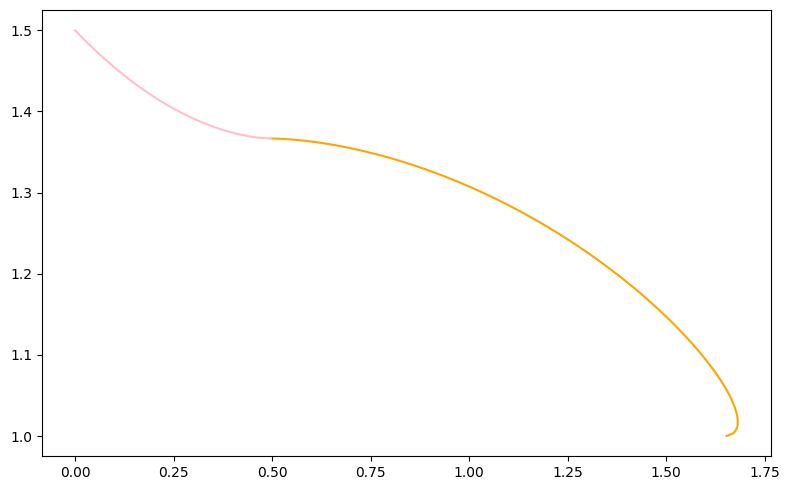

In [79]:
t= np.linspace(0,tf,int(nt))
for j in range(int(nt)):
    Q[j,0]=1+mu*(J[j,0]-1)**(5/3)
fig, ax = plt.subplots(figsize=(8,5)) 
#line,=ax.plot(t*mu**(1/k),Q[:int(nt),0],color='blue',label='height')
line,=ax.plot(Tst,Qst,color='orange')
line,=ax.plot(taustb,Qsta,color='pink')
#ax.set_xlim(0., 1)
#ax.set_ylim(1.5, 3.1)

#fig, ax = plt.subplots(figsize=(15,5)) 
#line,=ax.plot(J[:int(nt),0],color='blue',label='height')

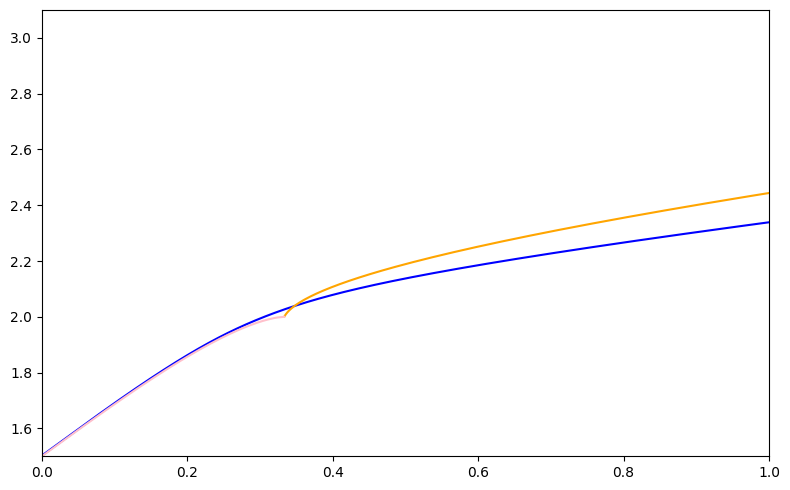

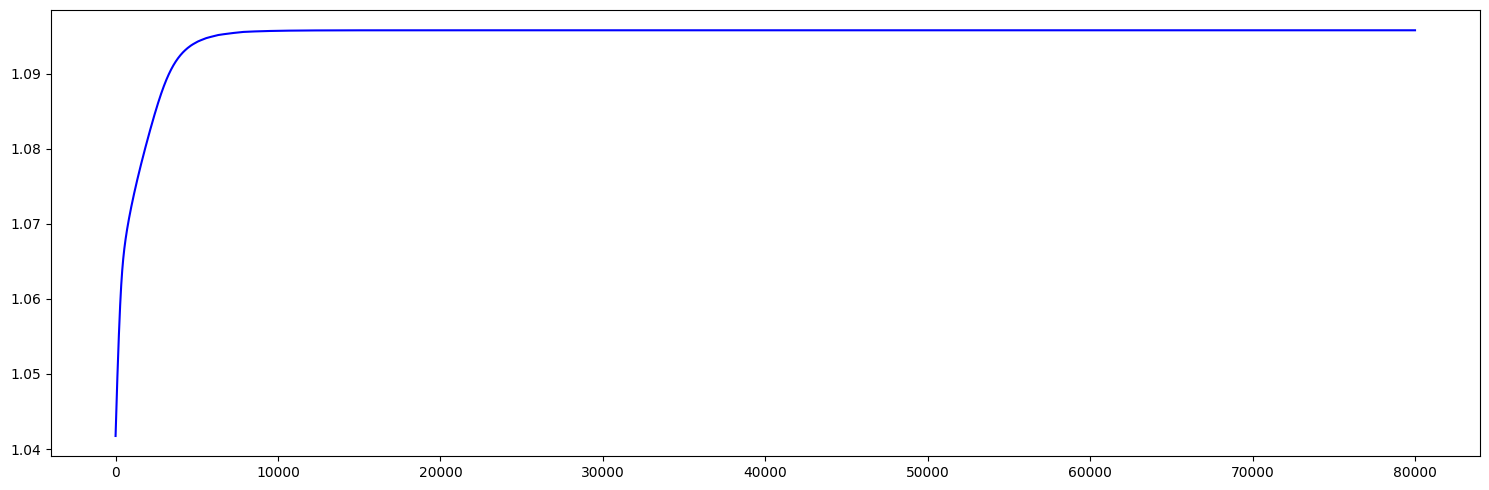

In [126]:
t= np.linspace(0,tf,int(nt))
for j in range(int(nt)):
    Q[j,0]=1+mu*(J[j,0]-1)**(5/3)
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(t*mu**(1/k),Q[:int(nt),0],color='blue',label='height')
line,=ax.plot(Tst,Qst,color='orange')
line,=ax.plot(taustb,Qsta,color='pink')
ax.set_xlim(0., 1)
ax.set_ylim(1.5, 3.1)



In [114]:
t= np.linspace(0,tf,int(nt))
print(tf)
print(int(nt))
rho0=1.5 
mu= 100
#for i in range(nt):
#Q= 1+ 1000000((0.0000005)**3/5.0-(0.9*x*10000))**5/3.0
  # coordinates of the grid point
fig, ax = plt.subplots(figsize=(15,5)) 
line,=ax.plot(1+mu*((0.5/mu)**(3/5)-(0.9*t))**(5/3.0)
    ,color='blue',label='height')


IndentationError: unexpected indent (3599704998.py, line 11)

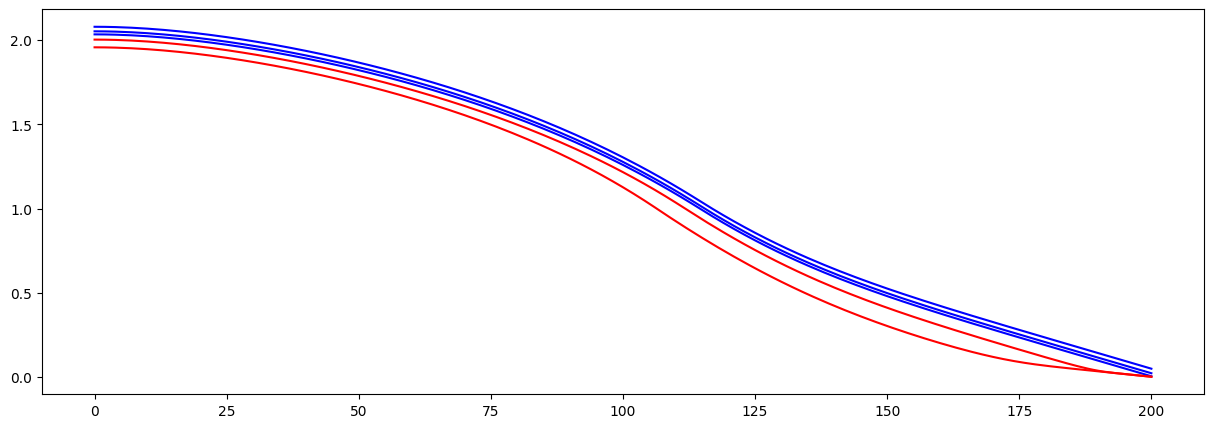

In [60]:
#a= J[0]+(rho-rho0)*t
fig, ax = plt.subplots(figsize=(15,5)) 
line,=ax.plot(J[int(3*nt/5)]+0.9*0,color='blue',label='height')
line,=ax.plot(J[int((3/5+0.02)*nt)],color='red',label='height')
line,=ax.plot(J[int(3*nt/5)]+0.9*0.02,color='blue',label='height')
line,=ax.plot(J[int((3/5+0.05)*nt)],color='red',label='height')
line,=ax.plot(J[int(3*nt/5)]+0.9*0.05,color='blue',label='height')

1.016143047146557
0.6303437031607397


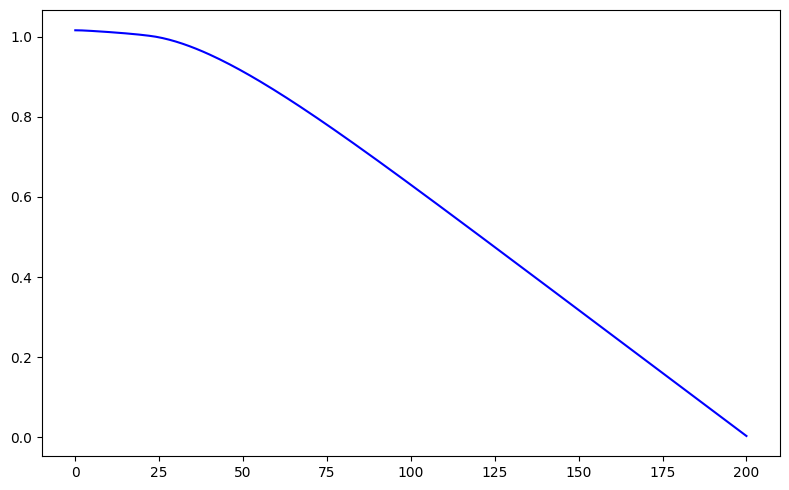

In [103]:
K=np.empty([nt+1,nx])
for i in range(nx):
    K[0,i]=J[nt,i]
    
print(K[0,0])
print(K[0,100])
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(K[0],color='blue',label='height')

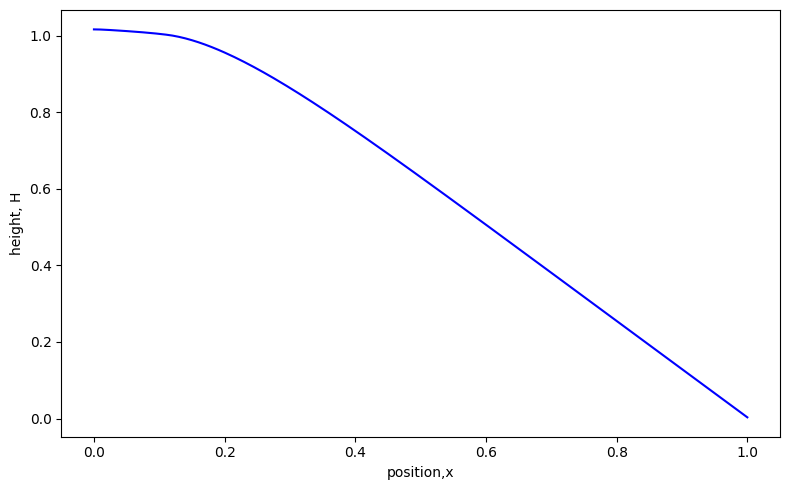

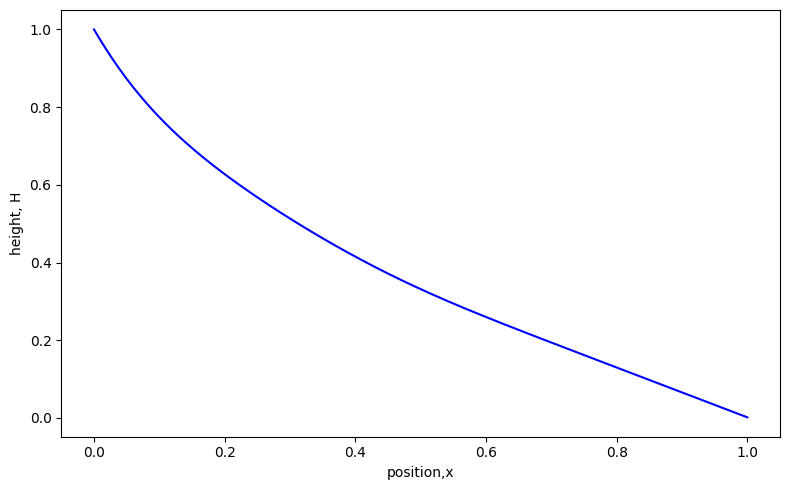

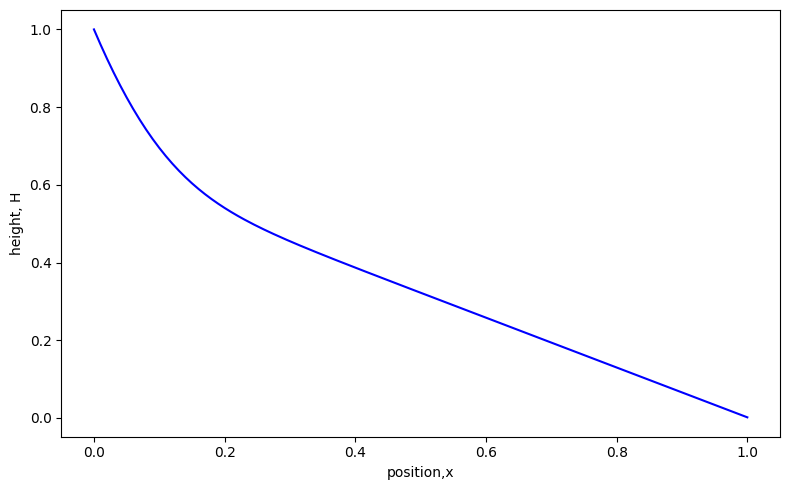

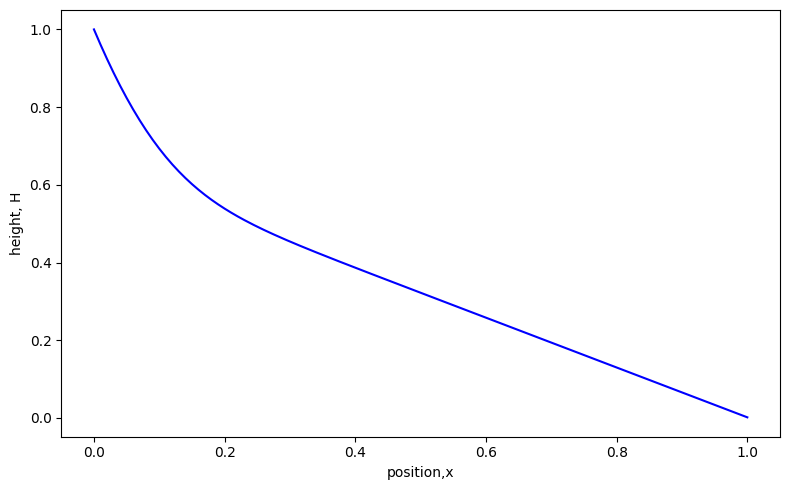

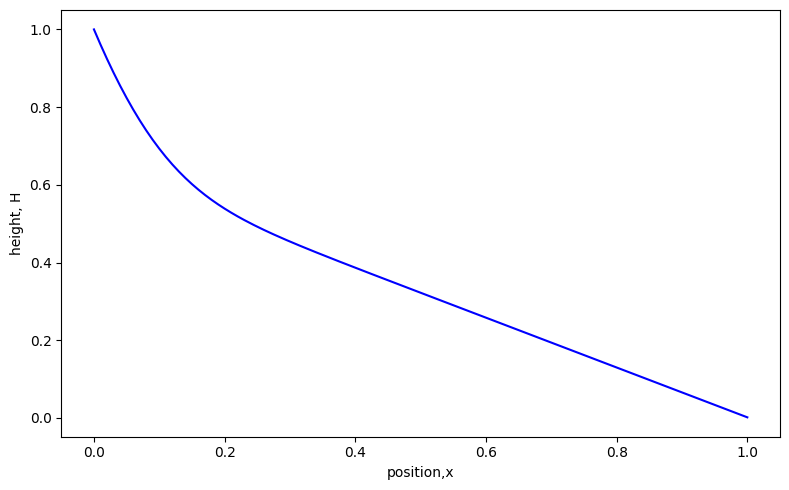

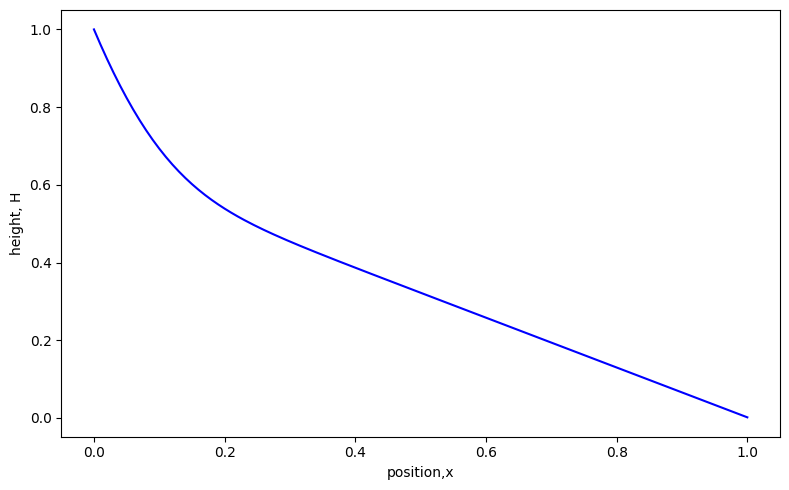

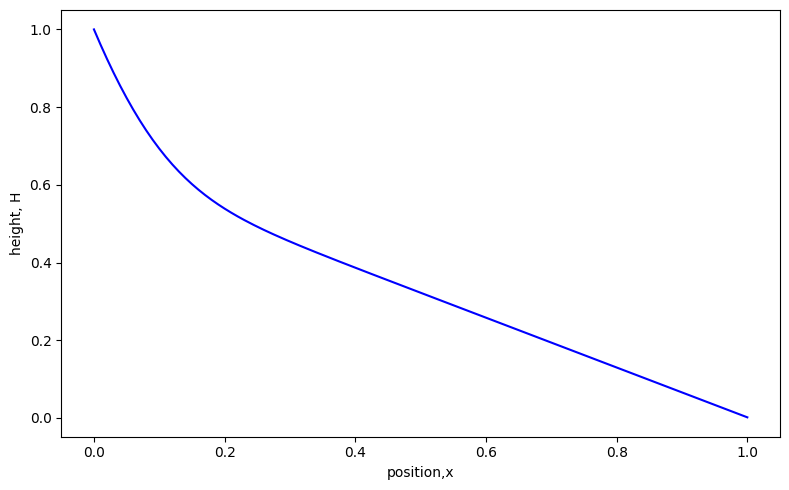

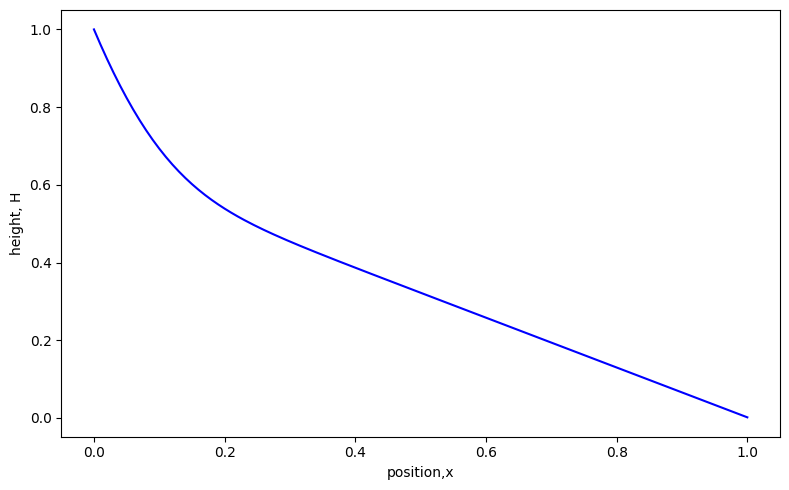

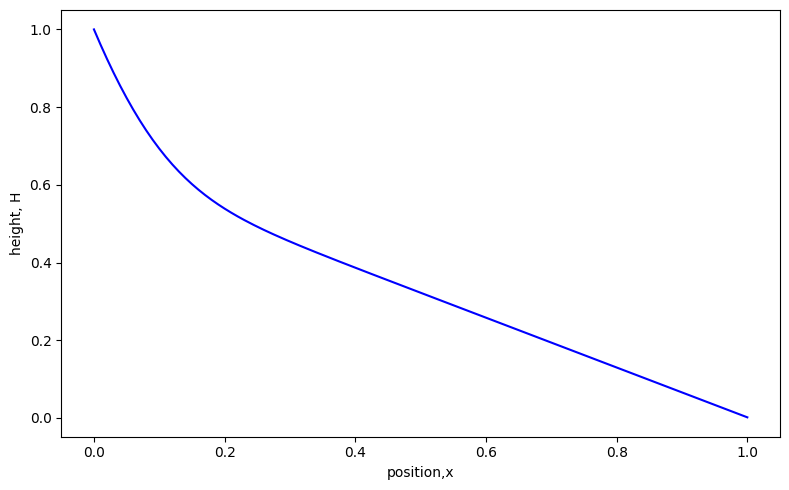

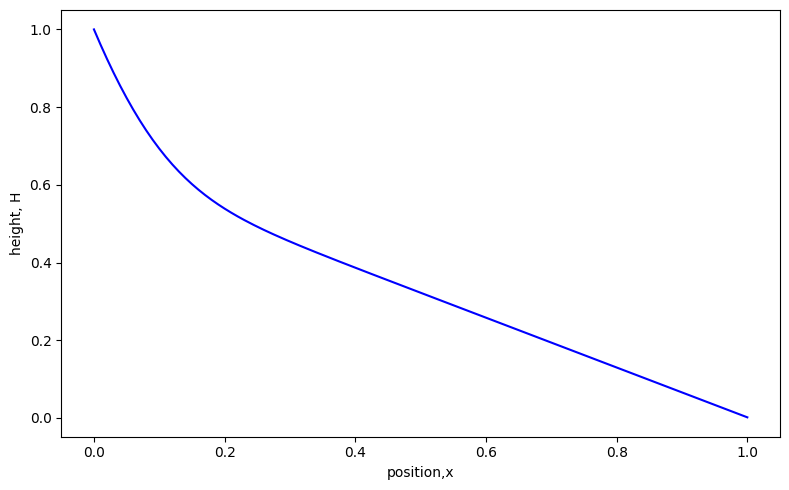

In [104]:
rho=0.6

d1mat[nx-1,nx-2:nx]= np.array([-0.5,-0.5])/dx
d2mat[nx-1,nx-2:nx]= np.array([1,-1])/dx**2
for i in range(nt):
    K[i+1]=K[i]+seep(K[i])*dt*(np.sign(K[i]-1)+1)/2 +fn(K[i])*dt*(np.sign(1-K[i])+1)/2
    K[i+1,0]=4.0/3.0*K[i+1,1]-1/3*K[i+1,2]# implementing boundary conditions
    if K[i+1,0]<=1 :    
        K[i+1,0]=1
    #J[i+1,nx-1]=0 #simplified
    #J[i+1,nx-1]= (-dx/(sigma) -1/2*J[i+1,nx-3]+2*J[i+1,nx-2])*2.0/3.0
    if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(8,5))  
        line,=ax.plot(x,K[i],color='blue',label='height')
        plt.ylabel('height, H')
        plt.xlabel('position,x')

1.0


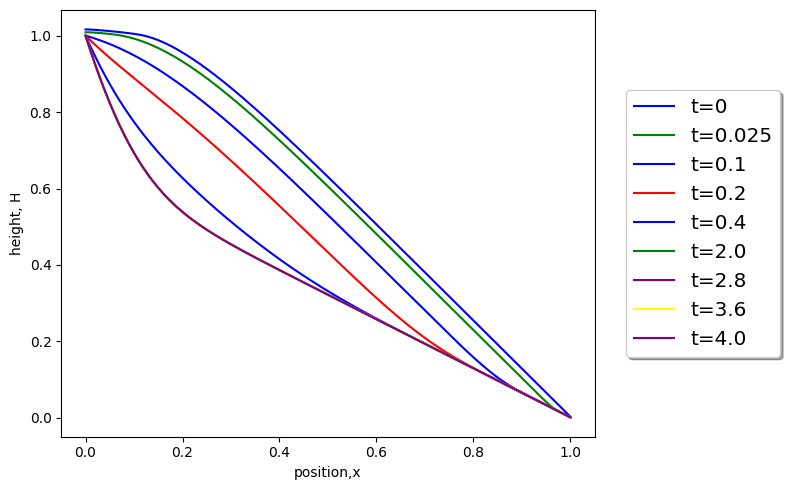

In [114]:
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(x,K[0],color='blue',label='t=0')
line,=ax.plot(x,K[500],color='green',label='t=0.025')
line,=ax.plot(x,K[2000],color='blue',label='t=0.1')
line,=ax.plot(x,K[int(nt/20)],color='red',label='t=0.2')
line,=ax.plot(x,K[int(nt/10)],color='blue',label='t=0.4')
line,=ax.plot(x,K[5*int(nt/10)],color='green',label='t=2.0')
line,=ax.plot(x,K[7*int(nt/10)],color='purple',label='t=2.8')
line,=ax.plot(x,K[9*int(nt/10)],color='yellow',label='t=3.6')
line,=ax.plot(x,K[nt],color='purple',label='t=4.0')
legend = ax.legend(bbox_to_anchor=(1.04,0.5), loc='center left', shadow=True, fontsize='x-large')
#plt.title('decreasing from steady state of rho0= 1.5')
plt.ylabel('height, H')
plt.xlabel('position,x')
print(K[nt,0])

We check that the numerical steady state we have found satifies equation 5.6 in MT3 ( only valid for H<=1)

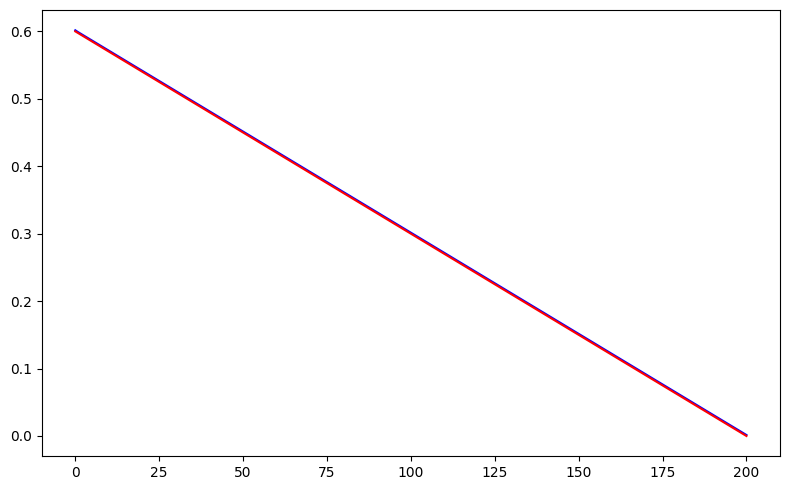

In [111]:
b= 0.5*K[nt]**2
d1mat[0,0:3]= np.array([-1.5,2,-0.5])/dx
s= sigma*d1mat@(b)+K[nt]
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(s,color='blue',label='height')
  
line,=ax.plot(rho*(1-x),color='red',label='height')

1.6666666666666667
1.0735393346764046
-0.0735393346764045
15.598164905901124
1.0685017607655445
16.909340256535472
1.0385142027944039


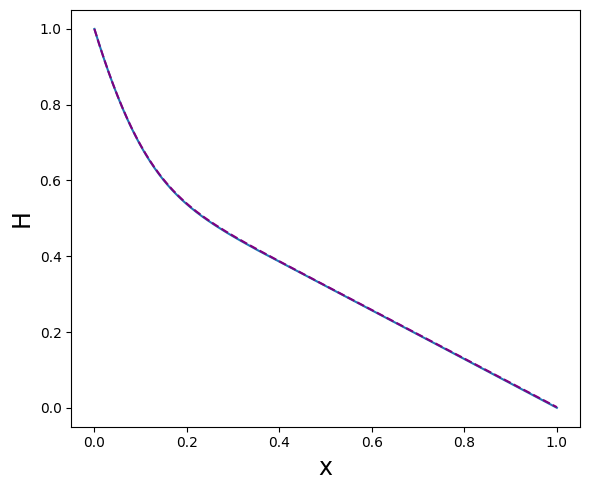

In [106]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

N = 201
sigma= 0.1
rho= 0.6

q=np.sqrt(1-4*sigma*rho)
b1 = (1+q)/(2*sigma*rho)
b2 = (1-q)/(2*sigma*rho)
beta = np.linspace(1/rho, b2, N)

C= 0.5*(1+1/q) 
D = 0.5* (1-1/q)
a= (np.abs(1/rho -b1))**C
g = (np.abs(1/rho - b2))**D
print(1/rho)
print(C)
print(D)
print(b1)
print(b2)
print(a)
print(g)


xi = 1-a*g*(np.abs(beta-b2)**(-D))/((np.abs(beta-b1))**C)
Hj= rho*beta*(1-xi)
fig, ax = plt.subplots(figsize=(6,5)) 

ax.plot(xi, Hj)
line,=ax.plot(x, K[int(nt)],color='purple',label='height',linestyle='dashed')
plt.ylabel('H', fontsize=17)
plt.xlabel('x', fontsize=17)
plt.show()